In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [2]:
df = pd.read_csv("../data/final/master_dataset.csv")
df["dateTime"] = pd.to_datetime(df["dateTime"])
df.head()


,dateTime,TN,TP,NH3,NO23,OP,SSC
0,1978-06-05,2.51,0.05,0.02,1.8,0.05,247.0
1,1978-07-12,2.13,0.19,0.02,1.3,0.05,359.0
2,1978-08-15,2.47,0.34,0.17,1.5,0.05,367.0
3,1978-09-14,2.40,0.16,0.02,0.6,0.05,159.0
4,1978-10-23,1.98,0.20,0.02,1.3,0.05,196.0


In [3]:
features = ["TN", "TP", "NH3", "NO23", "OP", "SSC"]
X = df[features]


In [4]:
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.05,   # 5% anomalies
    random_state=42
)

df["anomaly"] = iso_forest.fit_predict(X)


In [5]:
df["anomaly_label"] = df["anomaly"].map({
    1: "Normal",
    -1: "Anomaly"
})


In [6]:
df["anomaly_label"].value_counts()


anomaly_label
Normal     514
Anomaly     27
Name: count, dtype: int64

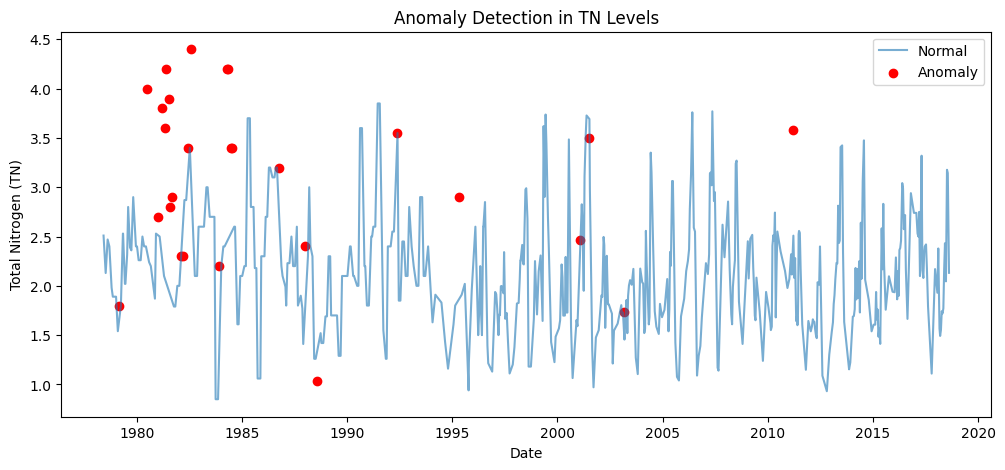

In [7]:
plt.figure(figsize=(12,5))

normal = df[df["anomaly"] == 1]
anomaly = df[df["anomaly"] == -1]

plt.plot(normal["dateTime"], normal["TN"], label="Normal", alpha=0.6)
plt.scatter(anomaly["dateTime"], anomaly["TN"], color="red", label="Anomaly")

plt.xlabel("Date")
plt.ylabel("Total Nitrogen (TN)")
plt.title("Anomaly Detection in TN Levels")
plt.legend()
plt.show()


In [8]:
df.to_csv("../data/final/master_dataset_with_anomalies.csv", index=False)


In [10]:
import pandas as pd

df = pd.read_csv("../data/final/master_dataset.csv")
df.head()


,dateTime,TN,TP,NH3,NO23,OP,SSC
0,1978-06-05,2.51,0.05,0.02,1.8,0.05,247.0
1,1978-07-12,2.13,0.19,0.02,1.3,0.05,359.0
2,1978-08-15,2.47,0.34,0.17,1.5,0.05,367.0
3,1978-09-14,2.40,0.16,0.02,0.6,0.05,159.0
4,1978-10-23,1.98,0.20,0.02,1.3,0.05,196.0


In [11]:
features = ["TP", "NH3", "NO23", "OP", "SSC"]
X = df[features]


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.ensemble import IsolationForest

anomaly_model = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42
)

anomaly_model.fit(X_scaled)


IsolationForest(contamination=0.05, n_estimators=200, random_state=42)

In [14]:
import joblib

joblib.dump(anomaly_model, "../models/anomaly_model.pkl")
print("Anomaly model saved!")


Anomaly model saved!
